In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pyDOE2 as pyDOE
import statsmodels

In [70]:
df = pd.read_csv('DOE industry4.0.csv', sep=';', decimal=',')

In [71]:

df.head(20)

,Width,Laserpower,Speed,Pulsefrequency,UDIcontrast,Contrast1,percentage
0,0.04,70,300,10,52,48927,0.238
1,0.04,80,600,20,46,36826,0.179
2,0.04,90,900,30,45,33007,0.199
3,0.04,100,1200,40,46,22950,0.164
4,0.06,70,600,30,44,27565,0.180
5,0.06,80,300,40,41,23220,0.184
6,0.06,90,900,10,40,4314,0.109
7,0.06,100,900,20,51,48257,0.254
8,0.08,70,900,40,9,0,0.000
9,0.08,80,1200,30,37,917,0.035


In [72]:
df.dtypes

Width             float64
Laserpower          int64
Speed               int64
Pulsefrequency      int64
UDIcontrast         int64
Contrast1           int64
percentage        float64
dtype: object

In [73]:
# Import statsmodels and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Define the formula for with interactions
formula_interactions = ["UDIcontrast ~ Width*Laserpower + Width*Speed + Width*Pulsefrequency + Laserpower*Speed + Laserpower*Pulsefrequency + Speed*Pulsefrequency",
                        "Contrast1 ~ Width*Laserpower + Width*Speed + Width*Pulsefrequency + Laserpower*Speed + Laserpower*Pulsefrequency + Speed*Pulsefrequency",
                        "percentage ~ Width*Laserpower + Width*Speed + Width*Pulsefrequency + Laserpower*Speed + Laserpower*Pulsefrequency + Speed*Pulsefrequency"]
formulas = ["UDIcontrast ~ Width + Laserpower + Speed + Pulsefrequency",
            "Contrast1 ~ Width + Laserpower + Speed + Pulsefrequency",
            "percentage ~ Width + Laserpower + Speed + Pulsefrequency"]

## Differences of ANOVA and MANOVA

The purpose of MANOVA (Multivariate Analysis of Variance) is to determine whether there are differences in the means of multiple dependent variables across different levels of one or more categorical independent variables.

In your experiment, your independent variables are 'Real_GFS' and 'Real_O', and your dependent variables are 'Porosity', 'Pa', 'Avg_D', 'Eq_through_D', and 'Hardness'. You are interested in understanding the joint effect of 'Real_GFS' and 'Real_O' on all five dependent variables simultaneously.

MANOVA is particularly useful in your case because it allows you to:

- **Study Multiple Measurements**: You are studying the impact of 'Real_GFS' and 'Real_O' on five different dependent variables. MANOVA allows you to assess these five dependent variables ('Porosity', 'Pa', 'Avg_D', 'Eq_through_D', and 'Hardness') simultaneously.
- **Protect Against Type I Errors**: If you were to conduct multiple ANOVA tests separately for each dependent variable, the probability of making a Type I error (i.e., falsely rejecting the null hypothesis) would increase. MANOVA allows you to conduct one analysis, thus controlling for this inflation of error.
- **Understand Inter-relationships Among Dependent Variables**: With MANOVA, you can gain insights into the inter-relationships among your dependent variables and how these relationships are influenced by 'Real_GFS' and 'Real_O'.
- **Explore Multivariate Effects**: If 'Real_GFS' and 'Real_O' do not have significant effects on individual dependent variables when considered separately, they may still have a significant combined effect on the set of dependent variables. MANOVA can detect these multivariate effects that univariate tests (like ANOVA) cannot [statisticsbyjim.com](https://statisticsbyjim.com/anova/multivariate-anova-manova-benefits-use/), [statology.org](https://www.statology.org/differences-between-anova-ancova-manova-mancova/), [en.wikipedia.org](https://en.wikipedia.org/wiki/Multivariate_analysis_of_variance).

However, to understand the effect of each independent variable ('Real_GFS' and 'Real_O') on each dependent variable separately, you would typically perform a series of univariate ANOVAs for each dependent variable [statisticsbyjim.com](https://statisticsbyjim.com/anova/multivariate-anova-manova-benefits-use/), [statology.org](https://www.statology.org/differences-between-anova-ancova-manova-mancova/).

In [74]:
#from statsmodels.multivariate.manova import MANOVA
#model_porosity = MANOVA.from_formula(formula_porosity, data=df)
#print(model_porosity.mv_test())

In [75]:
# List of factors
#factors = ['Real_GFS']

# Create a subplot for each factor
# plot the four plots near each other

#fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Loop through each factor and create a main effects plot
#for i, factor in enumerate(factors):
    #sns.lineplot(x=factor, y='Porosity', data=df, ax=axs[i], ci=None)
    #axs[i].set_title('Main Effects Plot for Factor {}'.format(factor))

# Display the plot
#plt.tight_layout()
#plt.show()

In [76]:
# Iterate over formulas and fit OLS models
for formula in formula_interactions:
    model = sm.OLS.from_formula(formula, data=df)
    result = model.fit()
    # Perform ANOVA
    anova_table = sm.stats.anova_lm(result, typ=2)
    # Print summary for each model
    # Print ANOVA results
    print(f"\nFormula: {formula}")
    print(anova_table)


Formula: UDIcontrast ~ Width*Laserpower + Width*Speed + Width*Pulsefrequency + Laserpower*Speed + Laserpower*Pulsefrequency + Speed*Pulsefrequency
                               sum_sq   df         F    PR(>F)
Width                      122.809053  1.0  1.990616  0.217358
Laserpower                 122.615892  1.0  1.987485  0.217667
Width:Laserpower            13.862486  1.0  0.224698  0.655461
Speed                       37.116946  1.0  0.601630  0.473029
Width:Speed                 56.758840  1.0  0.920006  0.381525
Pulsefrequency             119.522334  1.0  1.937342  0.222700
Width:Pulsefrequency       163.901858  1.0  2.656691  0.164044
Laserpower:Speed            30.910978  1.0  0.501037  0.510666
Laserpower:Pulsefrequency  203.201876  1.0  3.293707  0.129262
Speed:Pulsefrequency         0.072967  1.0  0.001183  0.973896
Residual                   308.469917  5.0       NaN       NaN

Formula: Contrast1 ~ Width*Laserpower + Width*Speed + Width*Pulsefrequency + Laserpower*Speed +

In [77]:
# Iterate over formulas and fit OLS models
for formula in formulas:
    model = sm.OLS.from_formula(formula, data=df)
    result = model.fit()
    # Perform ANOVA
    anova_table = sm.stats.anova_lm(result, typ=2)
    # Print summary for each model
    # Print ANOVA results
    print(f"\nFormula: {formula}")
    print(anova_table)


Formula: UDIcontrast ~ Width + Laserpower + Speed + Pulsefrequency
                    sum_sq    df         F    PR(>F)
Width           308.394767   1.0  4.748813  0.051940
Laserpower      186.932194   1.0  2.878473  0.117851
Speed            62.808545   1.0  0.967157  0.346527
Pulsefrequency  436.854734   1.0  6.726903  0.024976
Residual        714.355803  11.0       NaN       NaN

Formula: Contrast1 ~ Width + Laserpower + Speed + Pulsefrequency
                      sum_sq    df         F    PR(>F)
Width           1.264838e+09   1.0  8.934059  0.012320
Laserpower      4.360158e+08   1.0  3.079755  0.107046
Speed           1.170820e+09   1.0  8.269977  0.015085
Pulsefrequency  5.711004e+07   1.0  0.403391  0.538330
Residual        1.557323e+09  11.0       NaN       NaN

Formula: percentage ~ Width + Laserpower + Speed + Pulsefrequency
                  sum_sq    df          F    PR(>F)
Width           0.010598   1.0   4.202771  0.064968
Laserpower      0.030144   1.0  11.953923  0.00

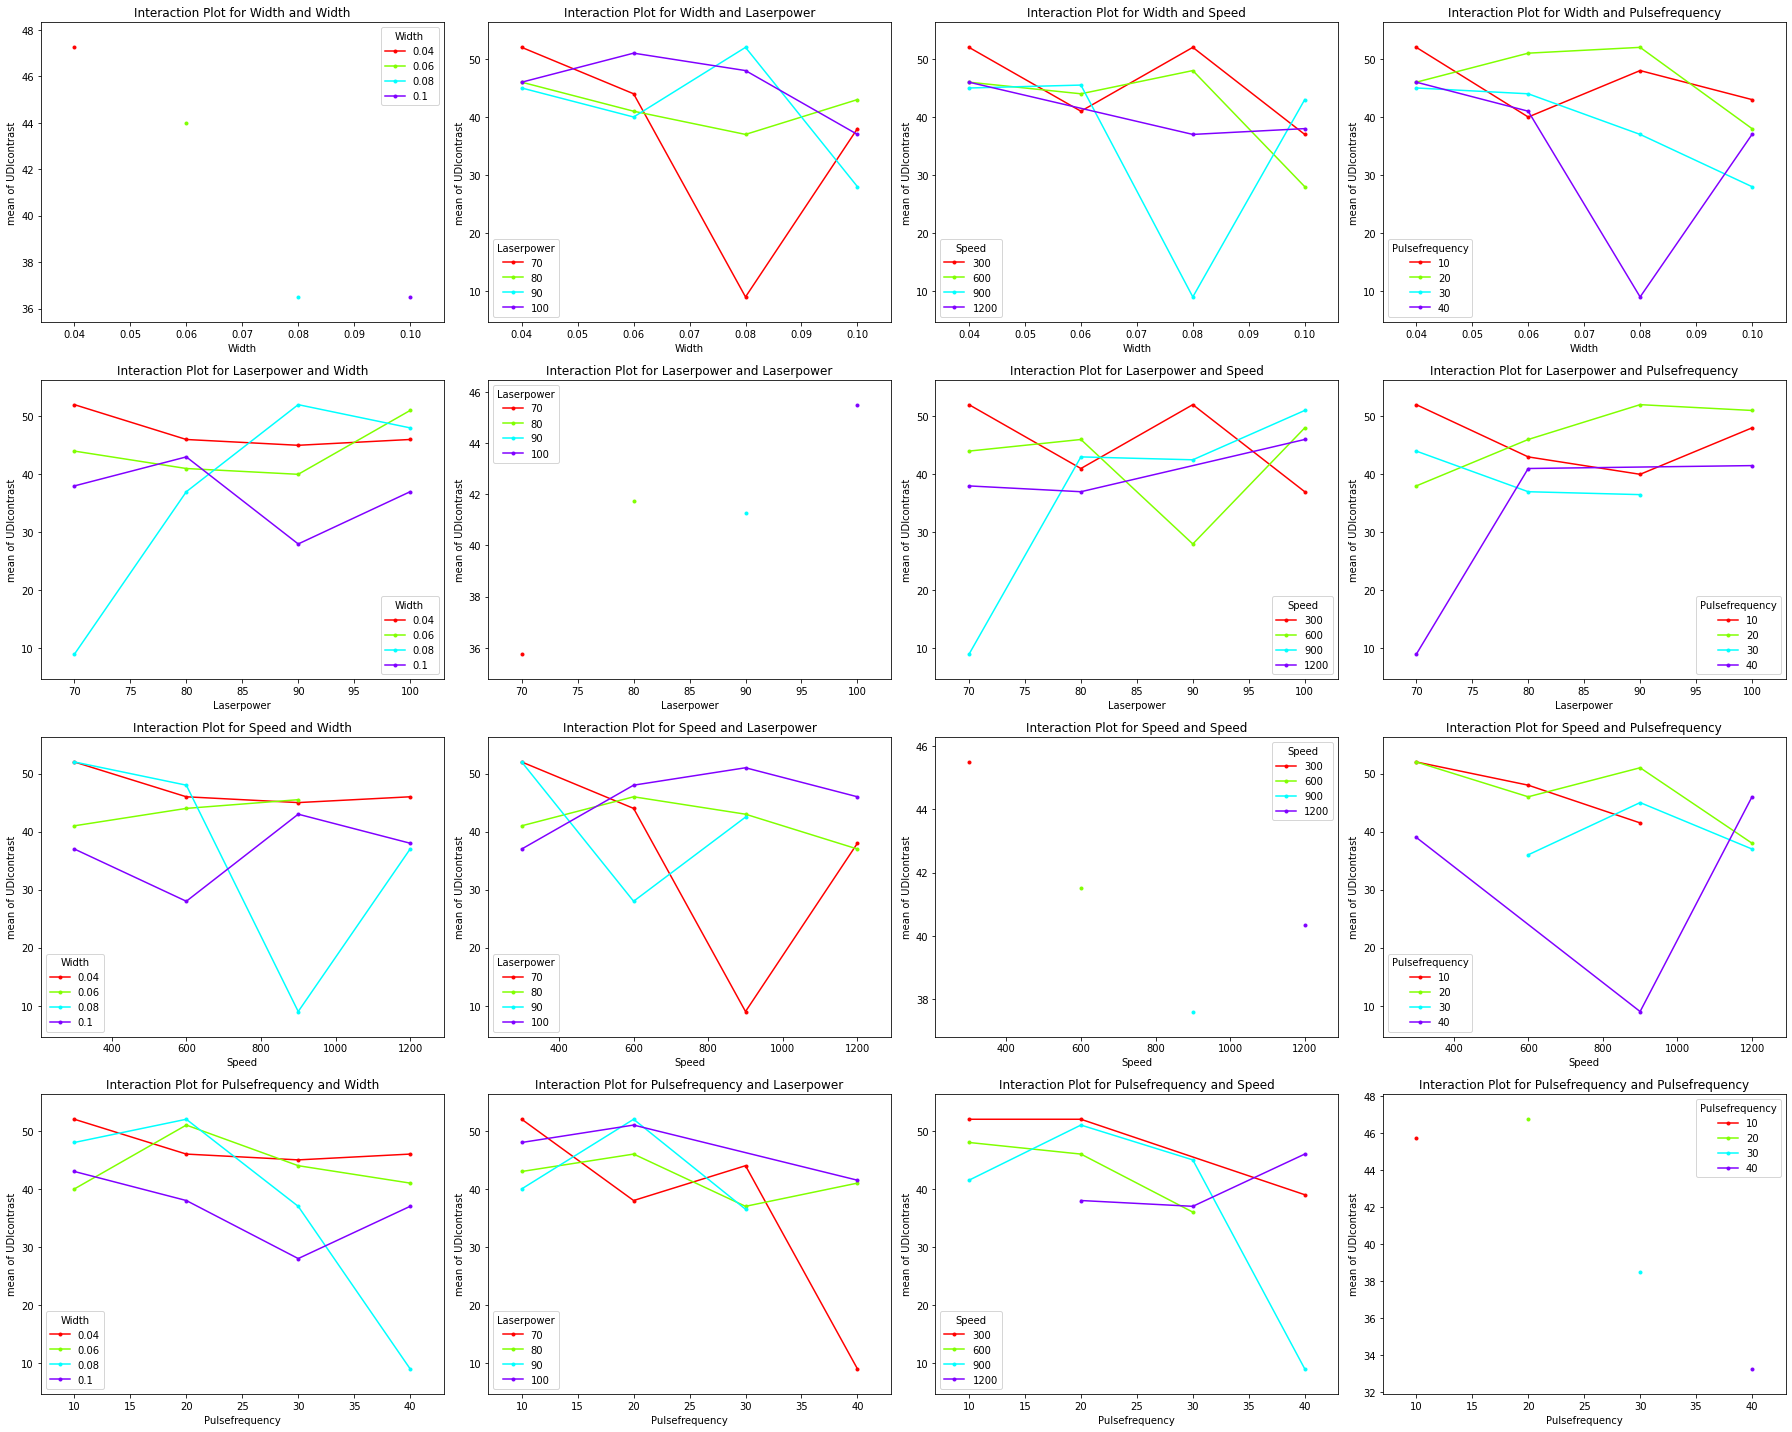

In [78]:
from statsmodels.graphics.factorplots import interaction_plot
# List of results
# List of variables
x = ['Width', 'Laserpower', 'Speed', 'Pulsefrequency']
y = ['Width','Laserpower', 'Speed', 'Pulsefrequency']

# Create a figure and a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(25, 20))

# Loop through the independent variables (x)
for i, independent_var in enumerate(x):
    # Loop through the fixed variables (y)
    for j, fixed_var in enumerate(y):
        # Create the interaction plot
        ax = axs[i, j]
        interaction_plot(x=df[independent_var], trace=df[fixed_var], response=df['UDIcontrast'], ax=ax)

        # Set the title of the plot
        ax.set_title(f'Interaction Plot for {independent_var} and {fixed_var}')

# Adjust the layout of the plot
plt.tight_layout()
plt.show()

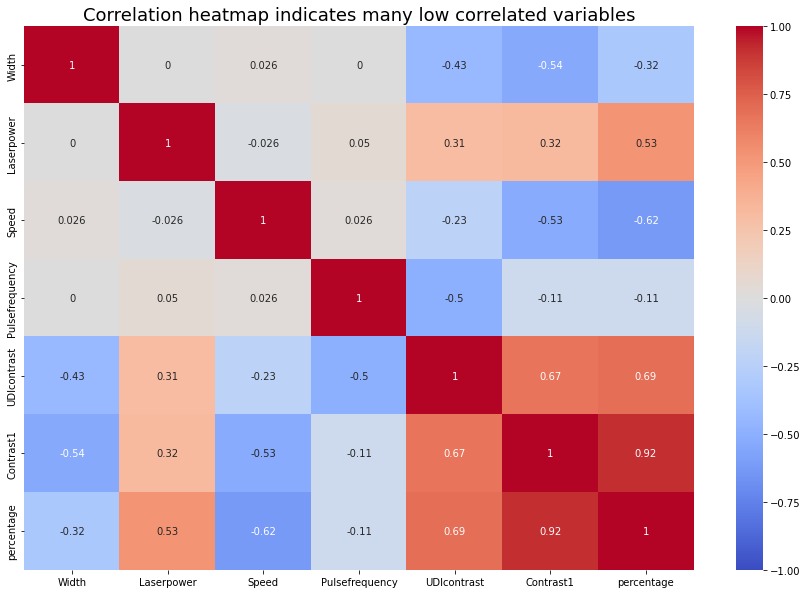

In [79]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show()

In [80]:
formula_with_interactions = "percentage ~  Width:Speed + Width:Pulsefrequency + Laserpower:Speed + Laserpower:Pulsefrequency + Speed:Pulsefrequency "

# Perform the ANOVA
model = ols(formula_with_interactions, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             percentage   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     6.015
Date:                Thu, 16 Nov 2023   Prob (F-statistic):            0.00801
Time:                        20:40:23   Log-Likelihood:                 28.073
No. Observations:                  16   AIC:                            -44.15
Df Residuals:                      10   BIC:                            -39.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

c:\Anaconda\envs\DOE2\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


## Fit a multiple regression model to predict the UDI contrast


In [81]:
# Create an OLS model.
OLS = ols(formula_with_interactions, data = df)

# Fit the model
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
print(model_results)

                            OLS Regression Results                            
Dep. Variable:             percentage   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     6.015
Date:                Thu, 16 Nov 2023   Prob (F-statistic):            0.00801
Time:                        20:40:23   Log-Likelihood:                 28.073
No. Observations:                  16   AIC:                            -44.15
Df Residuals:                      10   BIC:                            -39.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

c:\Anaconda\envs\DOE2\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
